In [2]:
# Libraries needed
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [3]:
current_directory = os.getcwd()
data_dir = current_directory + r"\Bases de datos"
Cuarto = pd.read_csv(data_dir + r"\Cuartodatos.csv")
Sexto = pd.read_csv(data_dir + r"\Sextodatos.csv")


In [4]:
# Basic info
Sexto.info()
Cuarto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 874280 entries, 0 to 874279
Data columns (total 32 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ANY               874280 non-null  int64  
 1   CODI_ALUMNE       425463 non-null  float64
 2   PCAT              857551 non-null  float64
 3   PCAT_CL           857551 non-null  float64
 4   PCAT_EE           857551 non-null  float64
 5   PCAST             860625 non-null  float64
 6   PCAST_CL          860625 non-null  float64
 7   PCAST_EE          860625 non-null  float64
 8   PMAT              862473 non-null  float64
 9   PMAT_NC           862473 non-null  float64
 10  PMAT_EFM          862462 non-null  float64
 11  PMAT_CR           862473 non-null  float64
 12  PANG              798193 non-null  float64
 13  PANG_CO           798193 non-null  float64
 14  PANG_CE           798215 non-null  float64
 15  PFRAN             4257 non-null    float64
 16  PFRAN_CO          42

Because the sixth grade dataset started recording data in 2009, it has two hundred thousand more entries than the fourth grade one. 

Moreover, we do not take into consideration the french and german languages grades because they were taken by lesser students than the catalan or english ones. 

It should be noted that 'PCIEN' and 'PMED' measure the same competences but they are called different. The first denomination appears in the fourth grade dataset and the second one in the sixth grade dataset. It should be noted both subjects have significantly less entries: 'PMED' has only two thousand entries whereas 'PCIEN' has four thousands, when 'PMAT' has about eight thousand entries.    

In [15]:
# Check for duplicate rows
print(Cuarto.duplicated().sum())
print(Sexto.duplicated().sum())

# Drop these rows from the data
Cuarto_no_duplicates = Cuarto.drop_duplicates()
Sexto_no_duplicates = Sexto.drop_duplicates()

# Create a new dataset with only 'ANY', 'GENERE', 'PCAT', 'PMAT', 'PANG', 'PMED'/'PCIEN' columns
 
Sexto_sin = Sexto_no_duplicates[['PCAT','PCAST','PANG','PMAT','PMED', 'ANY','GENERE']].copy()
Cuarto_sin = Cuarto_no_duplicates[['PCAT','PCAST','PANG','PMAT','PCIEN', 'ANY','GENERE']].copy()

# Rename the columns
Sexto_sin.rename(columns={'PCAT':'Catalan','PCAST': 'Spanish', 'PANG':'English', 'PMAT':'Mathematics', 'PMED':'Science' }, inplace=True)
Cuarto_sin.rename(columns={'PCAT':'Catalan','PCAST': 'Spanish', 'PANG':'English', 'PMAT':'Mathematics', 'PCIEN':'Science' },  inplace=True)
print(Cuarto_sin.info())
# Melt all subjects into one column for latter usage
Sexto_sin_melt = Sexto_sin.melt(id_vars = ['GENERE','ANY'], var_name = 'Subject', value_name='Grade')
Cuarto_sin_melt = Cuarto_sin.melt(id_vars = ['GENERE','ANY'], var_name = 'Subject', value_name='Grade')

# Names for the plots
new_subjects = ['Catalan','Spanish','English', 'Mathematics','Science']


229
11
<class 'pandas.core.frame.DataFrame'>
Int64Index: 708235 entries, 0 to 708463
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Catalan      680347 non-null  float64
 1   Spanish      669517 non-null  float64
 2   English      609788 non-null  float64
 3   Mathematics  685510 non-null  float64
 4   Science      457861 non-null  float64
 5   ANY          708235 non-null  int64  
 6   GENERE       708235 non-null  object 
dtypes: float64(5), int64(1), object(1)
memory usage: 43.2+ MB
None


We will use a colorblind palette when plotting our graphs

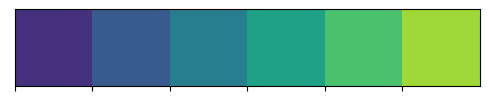

In [6]:
custom_palette = sns.color_palette("viridis")
sns.palplot(custom_palette)
plt.show()

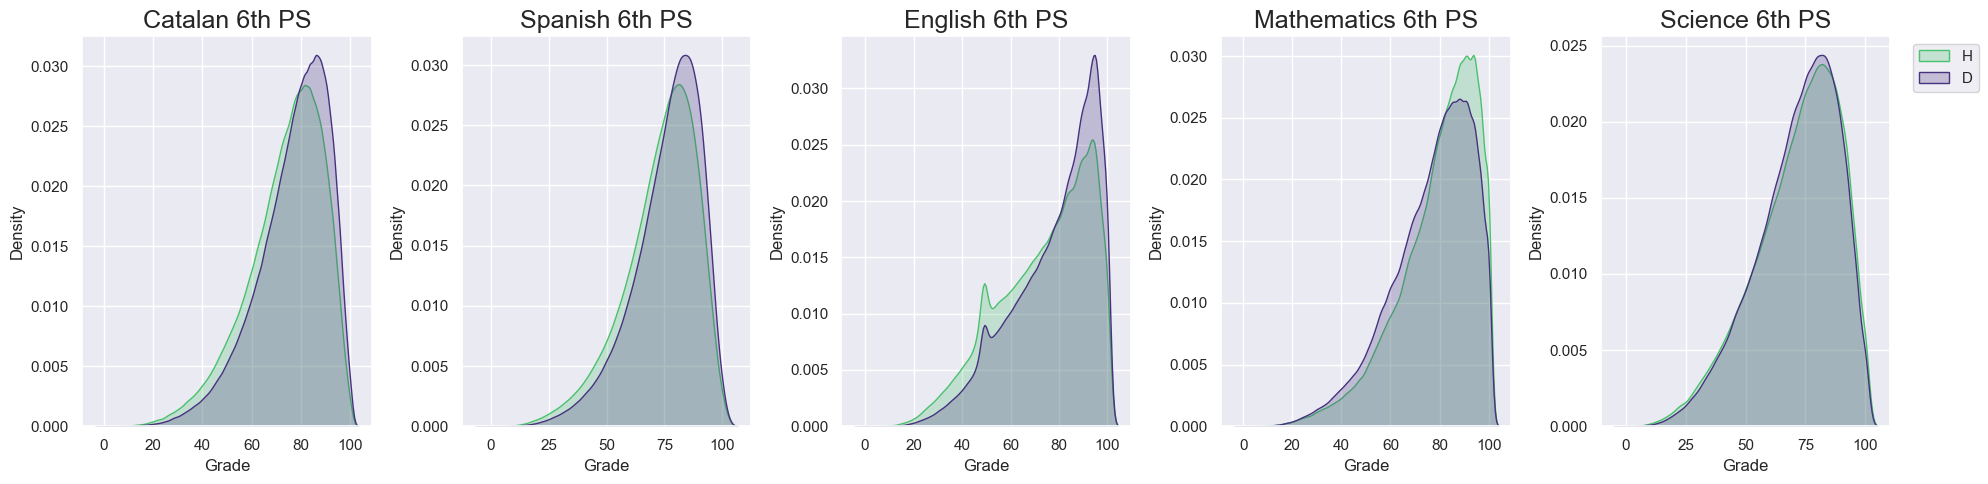

In [30]:
dataset = Sexto_sin
sns.set_theme(style='darkgrid')
fig, ax = plt.subplots(1, 5, figsize=(20,5))

for i, col in enumerate(dataset.columns[:5]):
        if col=='Spanish':
            control = 2
            sns.kdeplot(dataset.loc[dataset['GENERE'] == 'H', col],  bw_adjust = control, color=custom_palette[4],fill=True, label='H', ax=ax[i])
            sns.kdeplot(dataset.loc[dataset['GENERE'] == 'D', col],  bw_adjust = control,color=custom_palette[0],fill=True, label='D', ax=ax[i])
            ax[i].set_xlabel('Grade')
            ax[i].set_title(new_subjects[i] + ' 6th PS', fontsize=18)
        else:
            sns.kdeplot(dataset.loc[dataset['GENERE'] == 'H', col],  color=custom_palette[4],fill=True, label='H', ax=ax[i])
            sns.kdeplot(dataset.loc[dataset['GENERE'] == 'D', col],  color=custom_palette[0],fill=True, label='D', ax=ax[i])
            ax[i].set_xlabel('Grade')
            ax[i].set_title(new_subjects[i] + ' 6th PS', fontsize=18)
        if i == 4:
            ax[i].legend(loc='upper right', fontsize=18)
            ax[i].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
            plt.subplots_adjust(right=0.7)
        else:
            ax[i].legend().remove()
fig.tight_layout()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


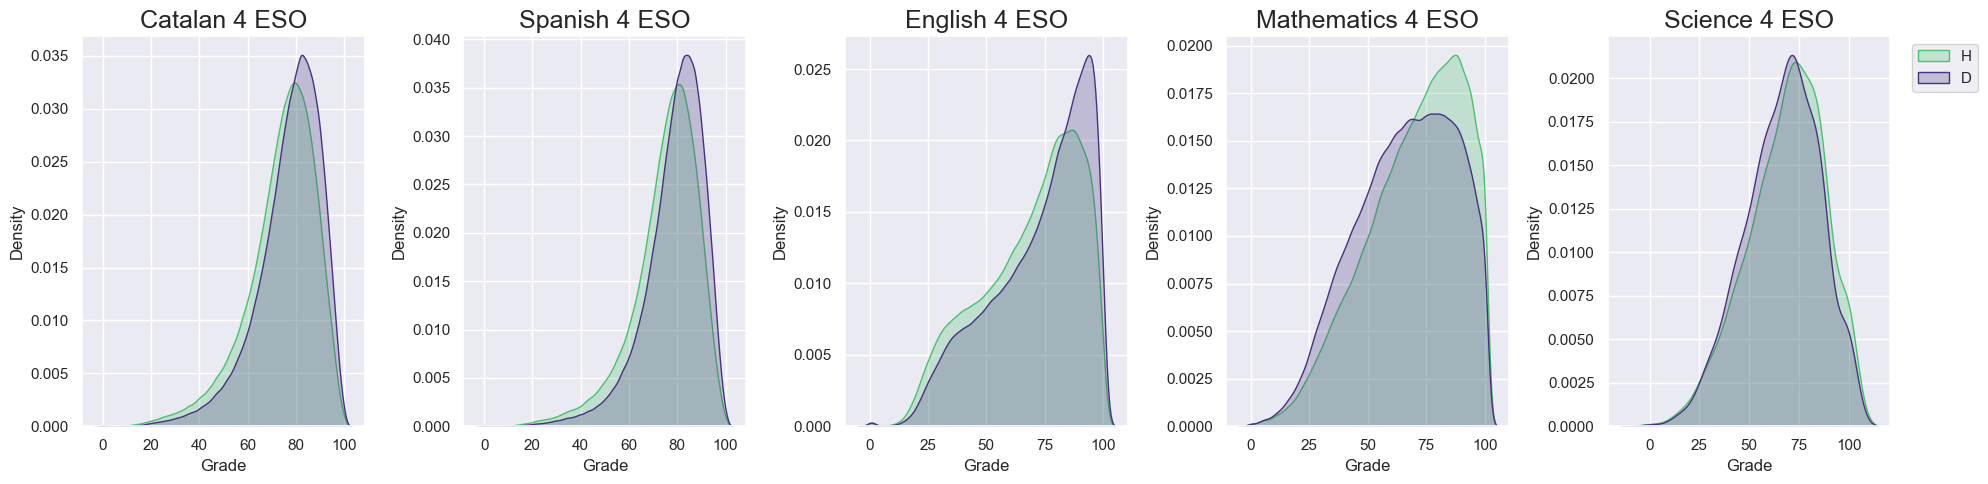

In [29]:
dataset = Cuarto_sin
fig, ax = plt.subplots(1, 5, figsize=(20,5))
legend_font = {'family': 'serif', 'size': 18}

plt.legend(prop=legend_font)
for i, col in enumerate(dataset.columns[:5]):
        if col=='Science':
            control = 3
            sns.kdeplot(dataset.loc[dataset['GENERE'] == 'H', col],  bw_adjust = control, color=custom_palette[4],fill=True, label='H', ax=ax[i])
            sns.kdeplot(dataset.loc[dataset['GENERE'] == 'D', col],  bw_adjust = control,color=custom_palette[0],fill=True, label='D', ax=ax[i])
            ax[i].set_xlabel('Grade')
            ax[i].set_title(new_subjects[i] + ' 4 ESO', fontsize=18)
        else:
            sns.kdeplot(dataset.loc[dataset['GENERE'] == 'H', col],  color=custom_palette[4],fill=True, label='H', ax=ax[i])
            sns.kdeplot(dataset.loc[dataset['GENERE'] == 'D', col],  color=custom_palette[0],fill=True, label='D', ax=ax[i])
            ax[i].set_xlabel('Grade')
            ax[i].set_title(new_subjects[i] + ' 4 ESO', fontsize=18)
        if i == 4:
            ax[i].legend(loc='upper right',prop=legend_font)
            ax[i].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
            plt.subplots_adjust(right=0.7)
        else:
            ax[i].legend().remove()
fig.tight_layout()

These plots show the marginal distribution of grades in each subject per genre of the student. There we can see the grades are not symmetrically distributed and have a strong skewness towards the higher grades, but differently with each subject. This may be due to what exams evaluate, because in the english language evaluation it is required to make a written essay whereas science exams are tests.  

In the sixth grade plots we see both genres have roughly the same probability in each subject. It is still noticeable a higher tendency in women, denoted as 'D', to score higher grades in language subjects, whereas males, denoted as 'H', score better results in mathematics. We see the fourth grade plots also reproducing this behaviour. 

It should be noted that the plots containing the marginal probability of 'PCAST 6' and 'PCIEN 4' have been greatly smoothered. If not, they showed "peaks" in every round number. Perhaps this could be due to how the exam was prepared or to how was it marked. 

If the "control" parameter used in this code is changed to a value lesser than 1 this behaviour can be shown. 

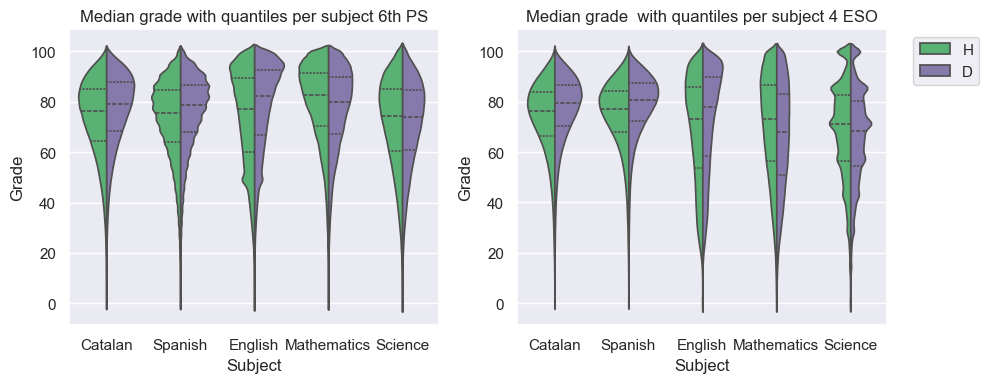

In [173]:
fig, ax = plt.subplots(1,2, figsize=(10,4))
sns.violinplot(data = Sexto_sin_melt, x="Subject", y="Grade", hue="GENERE", split=True, hue_order=['H','D'],palette=[custom_palette[4],'m'],inner="quart",ax=ax[0])
ax[0].set_title('Median grade with quantiles per subject 6th PS', prop=legend_font)
ax[0].legend().remove()
sns.violinplot(data = Cuarto_sin_melt, x="Subject", y="Grade", hue="GENERE",hue_order=['H','D'], palette=[custom_palette[4],'m'], split=True, inner="quart",ax=ax[1])
ax[1].set_title('Median grade  with quantiles per subject 4 ESO')
ax[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.subplots_adjust(right=0.7)
fig.tight_layout()



Each thick dotted line correponds to the median grade of the students. The thinner lines denote the 25 and 75 percentiles. 
We can conclude that 50% of the female students score higher than the corresponding 50% of the male students in languages, with the inverse result when looking at science subjects. 

We can wonder if this behaviour is reproduced in time. 

In [16]:
# Create new datasets with said medians and quantiles

df1 = Sexto_sin
subjects = ['Catalan','Spanish','English','Mathematics','Science']

medians_df = pd.DataFrame()

for subject in subjects:
    subject_stats = df1.groupby(['ANY', 'GENERE'])[f'{subject}'].agg(['median', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75)]).reset_index()
    subject_stats.columns = ['ANY', 'GENERE', f'{subject}_Median', f'{subject}_25th', f'{subject}_75th']
    # Merge with the result DataFrame
    if medians_df.empty:
        medians_df = subject_stats
    else:
        medians_df = pd.merge(medians_df, subject_stats, on=['ANY', 'GENERE'])
print(medians_df)
df = Cuarto_sin

mediansC_df = pd.DataFrame()

for subject in subjects:
    subject_stats = df.groupby(['ANY', 'GENERE'])[f'{subject}'].agg(['median', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75)]).reset_index()
    subject_stats.columns = ['ANY', 'GENERE', f'{subject}_Median', f'{subject}_25th', f'{subject}_75th']
    # Merge with the result DataFrame
    if mediansC_df.empty:
        mediansC_df = subject_stats
    else:
        mediansC_df = pd.merge(mediansC_df, subject_stats, on=['ANY', 'GENERE'])
print(mediansC_df)


     ANY GENERE  Catalan_Median  Catalan_25th  Catalan_75th  Spanish_Median  \
0   2009      D           80.72         71.08         89.16           79.27   
1   2009      H           78.31         66.27         86.75           75.61   
2   2010      D           76.80         64.20         86.40           75.20   
3   2010      H           76.40         64.20         85.40           71.40   
4   2011      D           81.40         71.70         89.40           77.70   
5   2011      H           77.30         66.70         86.30           73.20   
6   2012      D           84.60         73.20         92.50           80.60   
7   2012      H           81.30         69.20         90.10           78.10   
8   2013      D           75.30         63.90         83.40           76.90   
9   2013      H           72.00         60.20         81.10           74.60   
10  2014      D           79.60         69.70         86.80           79.20   
11  2014      H           76.90         66.40       

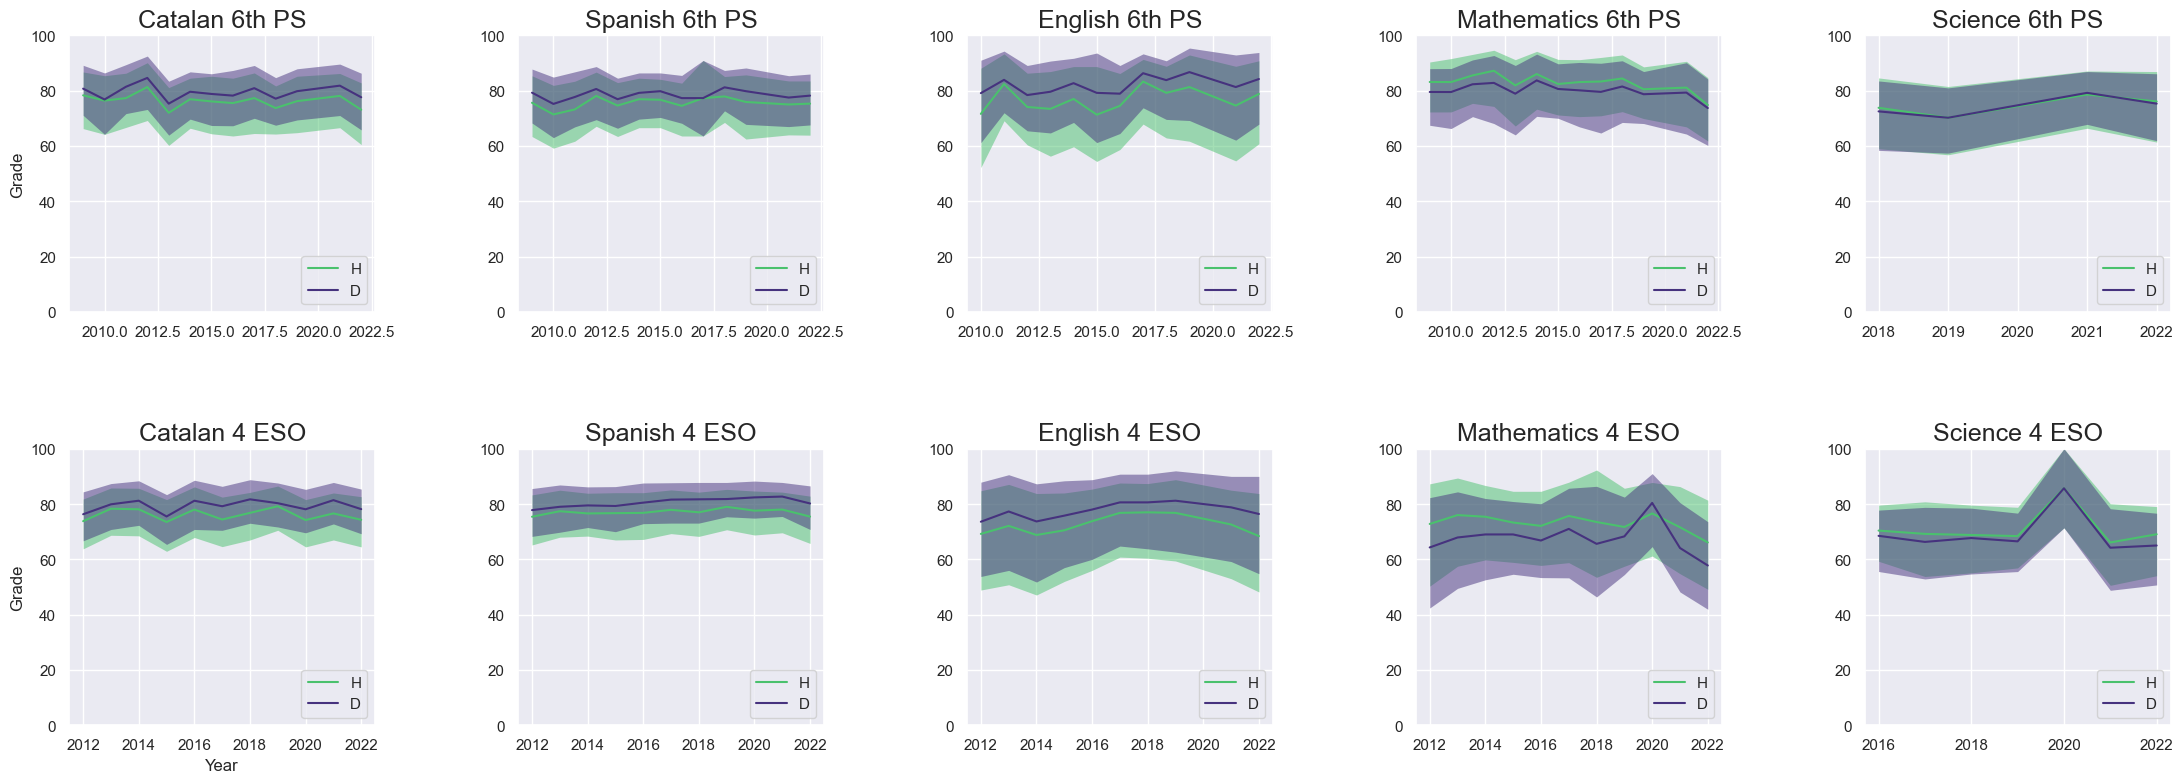

In [24]:
# Plot them 
sns.set_theme(style="darkgrid")
fig, ax= plt.subplots(2,5,figsize = (22, 8)) 

df1  = medians_df
sl = ['H', 'D']

years = np.arange(df1['ANY'].min(), 2020)
years2 = np.arange(2021, df1['ANY'].max()+1)
years1 = np.concatenate((years, years2))

for m in range(len(subjects)):
                medians = np.arange(len(years1))
                q025 = np.arange(len(years1))
                q075 = np.arange(len(years1))
                for j in range(len(sl)):   
                        if sl[j]=='D':
                                color = custom_palette[0]
                        else:
                                color = custom_palette[4]     
                        medians = df1[(df1['GENERE']==sl[j])][f'{subjects[m]}_Median'].to_numpy()
                        q025 = df1[(df1['GENERE']==sl[j])][f'{subjects[m]}_25th'].to_numpy()
                        q075 = df1[(df1['GENERE']==sl[j])][f'{subjects[m]}_75th'].to_numpy()
                        ax[0,m].plot(years1, medians, color = color, label = sl[j])
                        if m==1:
                                ax[0,0].set_ylabel('Grade')
                        ax[0,m].fill_between(years1, q025, q075, alpha=.5, linewidth=0,color=color)
                        ax[0,m].set_ylim([0,100])
                        ax[0,m].legend(loc= 'lower right')


years = np.arange(2012,2023)

df = mediansC_df


for m in range(len(subjects)):
                medians = np.arange(len(years))
                q025 = np.arange(len(years))
                q075 = np.arange(len(years))
                if subjects[m]=='English':
                        years = np.concatenate((np.arange(2012,2020), np.arange(2021,2023)))
                else:
                        years = np.arange(2012,2023)
                for j in range(len(sl)):   
                        color = custom_palette[0] if sl[j] == 'D' else custom_palette[4]    
                        medians = df[(df['GENERE']==sl[j])][f'{subjects[m]}_Median'].to_numpy()
                        q025 = df[(df['GENERE']==sl[j])][f'{subjects[m]}_25th'].to_numpy()
                        q075 = df[(df['GENERE']==sl[j])][f'{subjects[m]}_75th'].to_numpy()
                        if subjects[m]=='English':
                                medians = np.delete(medians, -3)
                                q025 = np.delete(q025, -3)
                                q075 = np.delete(q075, -3)
                        ax[1,m].plot(years, medians, color = color, label = sl[j])
                        if m==1:
                                ax[1,0].set_xlabel('Year')
                                ax[1,0].set_ylabel('Grade')
                        ax[1,m].fill_between(years, q025, q075, alpha=.5, linewidth=0,color=color)
                        ax[1,m].set_ylim([0,100])
                        ax[1,m].legend(loc= 'lower right')
for m in range(len(subjects)):
        ax[0,m].set_title(new_subjects[m] + ' 6th PS',fontsize=18)
        ax[1,m].set_title(new_subjects[m] + ' 4 ESO',fontsize=18)
fig.tight_layout(h_pad=5, w_pad=5)